<a href="https://colab.research.google.com/github/ASBRUC/DSPS_ABruce/blob/main/HW2_Alex_Bruce_Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



**Group:** I, Alex Bruce worked together with Zoe Beris, TJ Tomaszeski, and Katie Moses.

**Breakdown of work:** <br>
Zoe Beris - Data visualization, plotting parameters, labeling. <br>
Katie Moses - Postieror function concepts. <br>
Alex Bruce - Support and distributions generation. <br>
TJ - Descriptions/analysis of figures.

In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
...

Ellipsis

In [2]:
np.random.seed(505)

In [3]:
np.random.seed(505)
support = np.arange(-15,15,0.25)
Norm_0 = stats.norm.pdf(support, 0,scale=1)
Norm_10 = stats.norm.pdf(support, 10, scale=1)
tStudent_0 = stats.t.pdf(support, 2, 0)
tStudent_10 = stats.t.pdf(support, 2, 10)


In [4]:
def posterior(prior, likelihood):
  normalized_prior = prior / np.sum(prior);
  normalized_likelihood = likelihood / np.sum(likelihood);
  this_posterior = prior * likelihood;
  normalized_posterior = this_posterior / np.sum(this_posterior);
  plt.plot(support, normalized_prior,color="black",label="prior",ls="--");
  plt.plot(support, normalized_likelihood,color="black",label="likelihood",ls="-");
  plt.plot(support, normalized_posterior,color="red",label="posterior",ls="-");
  plt.legend();
  plt.xlabel("Value") #all plots need axis labels!!
  plt.ylabel("Probability") #all plots need axis labels!!

Text(0.5, 1.0, 'Normal Distribution μ = 0 and σ² = 1')

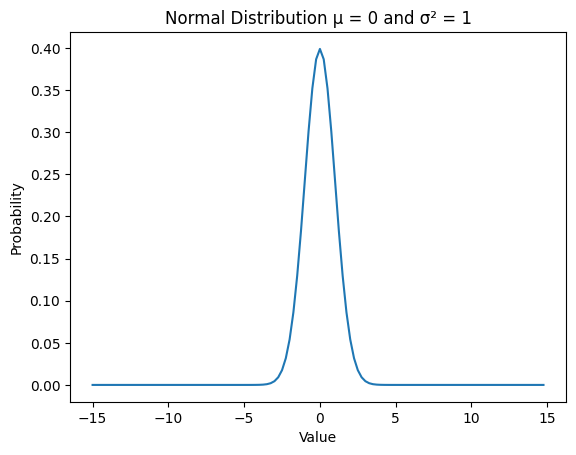

In [5]:
 #"Normal Distribution with a mean of 0 and variance of 1"
 plt.plot(support,Norm_0);
 plt.xlabel("Value");
 plt.ylabel("Probability");
 plt.title("Normal Distribution μ = 0 and \u03C3\u00B2 = 1")

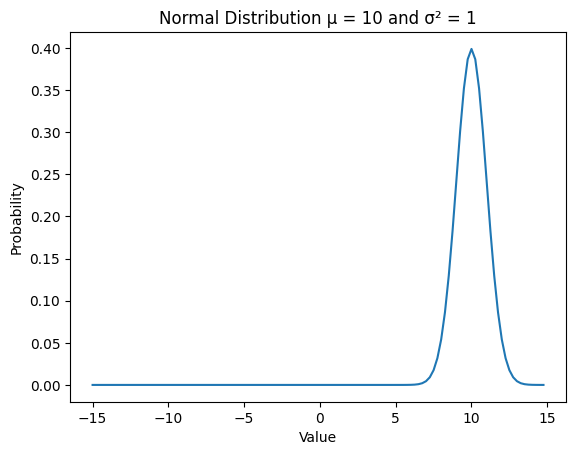

In [6]:
 #"Normal Distribution with a mean of 10 and variance of 1"
plt.plot(support, Norm_10);
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Normal Distribution μ = 10 and \u03C3\u00B2 = 1");

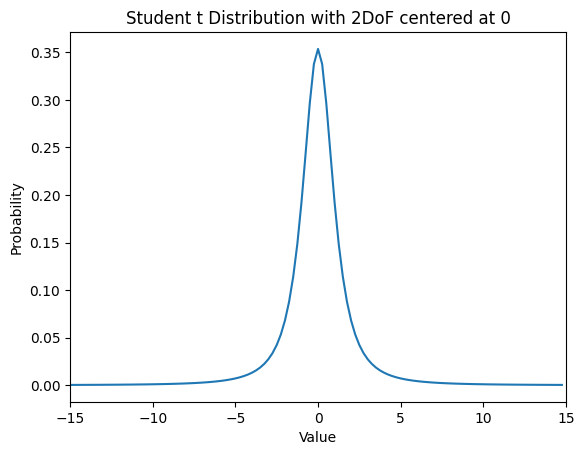

In [7]:
plt.plot(support, tStudent_0);
plt.xlim(-15,15)
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Student t Distribution with 2DoF centered at 0");

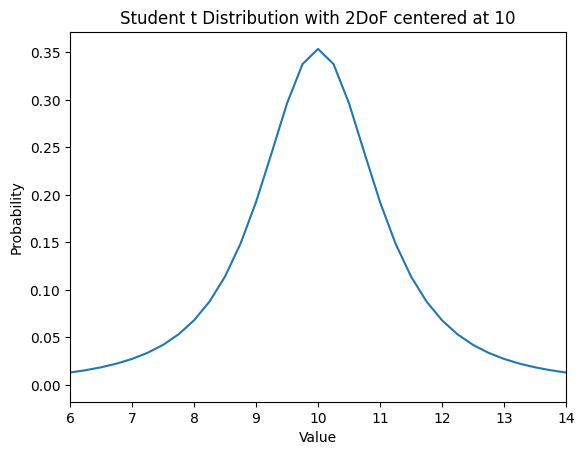

In [8]:
plt.plot(support,tStudent_10);
plt.xlim(6,14);
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Student t Distribution with 2DoF centered at 10");

**Fig 1:** Normal - Normal

Text(0.5, 1.0, 'Posterior Distribution of Norm_0 given Norm_10')

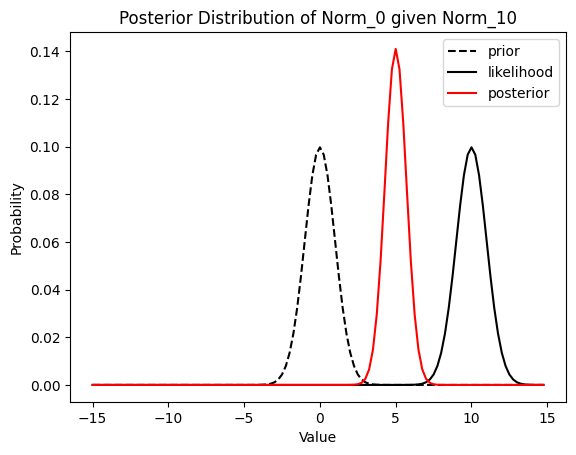

In [9]:
#function call
#Norm_0
posterior(Norm_0,Norm_10)
plt.title("Posterior Distribution of Norm_0 given Norm_10")

**Figure 1** displays a standard normal with a mean 0 and variance 1 (norm_0), plotted with a standard normal of mean 0 and a variance 10 (norm_10). The prior of norm_0 is centered at zero and the likelihood of norm_10 is centered at norm_10. The posterior is centered at 5, at an equal distance from each peak, which would be the mean of both data sets. This plot parallels to the top-left plot in the mentioned twitter post.

**Fig 2:** Student t - Student t

Text(0.5, 1.0, 'Posterior Distribution of Student t_0 given Student t_10')

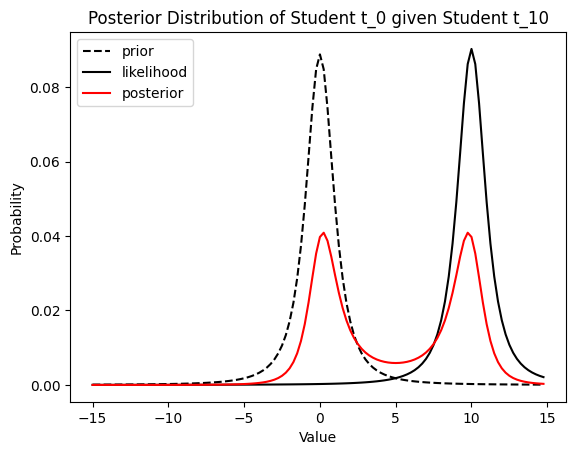

In [10]:
posterior(tStudent_0,tStudent_10);
plt.title("Posterior Distribution of Student t_0 given Student t_10")

**Figure 2** uses a T Student with a mean 0 and 2 degrees of freedom (tStudent_0), plotted with a T Student of mean 10 and two degrees of freedom (tStudent_10). The students t distributions are centered like they are on figure 1, on the function's respective means. Compared to the Norm_0 and Norm_10 distributions, these student t distribions have heavier tails, leading to enough correlation to make two posterior peaks centered close to the student t respective peaks. This is also representative of the top-right (second) graph in the tweet.

**Fig 3:** Normal - Student t

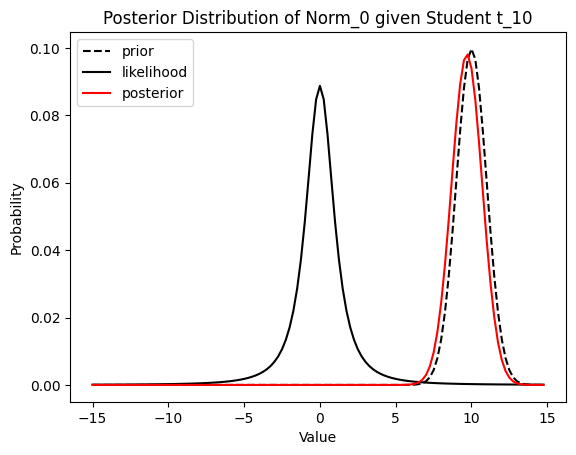

In [11]:
posterior(Norm_10, tStudent_0);
plt.title("Posterior Distribution of Norm_0 given Student t_10");

**Figure 3** uses Norm_10 and tStudent_0 attributes to create a plot where the likelihood of tStudent_0 centered on the mean of 0, and the prior of Norm_10 is centered on the mean of 10. The posterior is barely offset to the left of the prior. This makes sense that the posterior mainly follows the trend of the normalized plots as they have larger extrema than the student plots, meaning the normalized data influences the posterior significantly more than that of the tStudent plots. This is also the bottom-right (fourth) plot on the tweet.

**Fig 4:** Student t - Normal

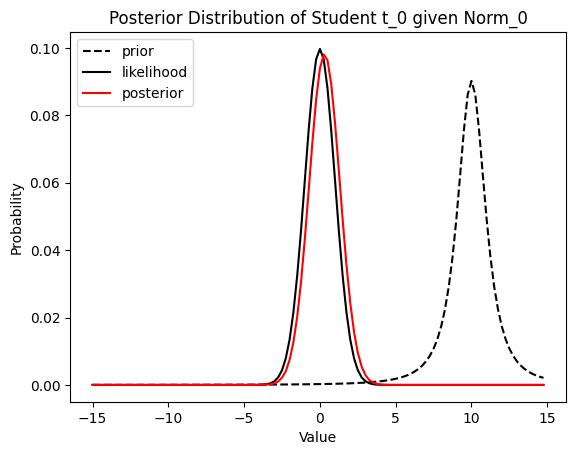

In [12]:
posterior(tStudent_10, Norm_0);
plt.title("Posterior Distribution of Student t_0 given Norm_0");

**Figure 4** uses tStudent_10 and Norm_0 to generate our prior, likelihood, and posterior. Our prior is centered on the tStudent_10 mean, while our likelihood is centered on Norm_0. Our posterior is just slightly offset to the right from our likelihood for the same reason it is offset in figure 3's description. This also produces the same plot found in the bottom-left (third) graph in the tweet.